# **The SABR Implied Volatilities**

In [1]:
import math
import pandas as pd
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

from scipy.stats import norm
import scipy.integrate as integrate
import scipy.special as special 

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

In [2]:
def haganLogNormalApprox(K, T, F, sigma_0, beta, xi, rho):
    '''
    function which returns the Black implied volatility, 
    computed using the Hagen et al. lognormal approximation
    
    @var K: option strike
    @var T: option expiry (in years)
    @var sigma_0: SABR alpha at t=0
    @var beta: SABR beta
    @var xi: SABR xi (also known as nu)
    @var rho: SABR rho
    '''
    
    one_beta = 1.0 - beta
    one_betasqr = one_beta**2
    
    if F != K:
        fK = F * K
        fK_beta = np.power(fK, one_beta/2.0)
        log_fK = np.log(F / K)
        z = xi / sigma_0 * fK_beta * log_fK
        x = np.log((np.sqrt(1.0 - 2.0 * rho * z + z * z) + z - rho) / (1 - rho))
        sigma_l = (sigma_0 / fK_beta / (1.0 + one_betasqr / 24.0 * log_fK * log_fK + np.power(one_beta * log_fK , 4) / 1920.0) * (z / x))
        sigma_exp = (one_betasqr / 24.0 * sigma_0 * sigma_0 / fK_beta / fK_beta + 0.25 * rho * beta * xi * sigma_0 / fK_beta + (2.0 - 3.0 * rho * rho) / 24.0 * xi * xi)
        sigma = sigma_l * ( 1.0 + sigma_exp * T)
        
    else:
        f_beta = np.power(F, one_beta)
        f_two_beta = np.power(F, (2.0 - 2.0 * beta))
        sigma = ((sigma_0 / f_beta) * (1.0 + ((one_betasqr / 24.0) * (sigma_0**2 / f_two_beta) + (0.25 * rho * beta * xi * sigma_0 / f_beta) \
                                              + (2.0 - 3.0 * rho * rho) / 24.0 * xi**2) * T))
        
    return sigma

In [3]:
haganLogNormalApprox(K=0.02, T=1, F=0.025, sigma_0=0.03, beta=1, xi=0.3, rho=-0.3)

0.04832509104342206

In [4]:
T = 1.
beta = 1.
F = 0.025
rho = -0.3
xi = 0.3
sigma_0 = 0.03

K = np.linspace(0.01,0.06, 40)

In [5]:
###################################################### For T = (0.003, 0.5, 1)
T1 = 0.003
T2 = 0.5
sabr_prices_T = []
sabr_prices_T1 = []
sabr_prices_T2 = []

for i in range(40):
    hagan_T = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho)
    sabr_prices_T.append(hagan_T)
    
    hagan_T1 = haganLogNormalApprox(K[i], T1, F, sigma_0, beta, xi, rho)
    sabr_prices_T1.append(hagan_T1)
    
    hagan_T2 = haganLogNormalApprox(K[i], T2, F, sigma_0, beta, xi, rho)
    sabr_prices_T2.append(hagan_T2)

###################################################### For F = (0.015, 0.025, 0,035)
F1 = 0.015
F2 = 0.035
sabr_prices_F = []
sabr_prices_F1 = []
sabr_prices_F2 = []

for i in range(40):
    hagan_F = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho)
    sabr_prices_F.append(hagan_F)
    
    hagan_F1 = haganLogNormalApprox(K[i], T, F1, sigma_0, beta, xi, rho)
    sabr_prices_F1.append(hagan_F1)
    
    hagan_F2 = haganLogNormalApprox(K[i], T, F2, sigma_0, beta, xi, rho)
    sabr_prices_F2.append(hagan_F2)
    
###################################################### For xi = (0.1, 0.3, 0,5)
xi1 = 0.1
xi2 = 0.5
sabr_prices_xi = []
sabr_prices_xi1 = []
sabr_prices_xi2 = []

for i in range(40):
    hagan_xi = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho)
    sabr_prices_xi.append(hagan_xi)
    
    hagan_xi1 = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi1, rho)
    sabr_prices_xi1.append(hagan_xi1)
    
    hagan_xi2 = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi2, rho)
    sabr_prices_xi2.append(hagan_xi2)
    
###################################################### For sigma_0 = (0.01, 0.03, 0,05)
sigma_01 = 0.01
sigma_02 = 0.05
sabr_prices_sigma_0 = []
sabr_prices_sigma_01 = []
sabr_prices_sigma_02 = []

for i in range(40):
    hagan_sigma_0 = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho)
    sabr_prices_sigma_0.append(hagan_sigma_0)
    
    hagan_sigma_01 = haganLogNormalApprox(K[i], T, F, sigma_01, beta, xi, rho)
    sabr_prices_sigma_01.append(hagan_sigma_01)
    
    hagan_sigma_02 = haganLogNormalApprox(K[i], T, F, sigma_02, beta, xi, rho)
    sabr_prices_sigma_02.append(hagan_sigma_02)
    
###################################################### For rho = (-0.8, -0.3, 0,8)
rho1 = -0.8
rho2 = 0.8
sabr_prices_rho = []
sabr_prices_rho1 = []
sabr_prices_rho2 = []

for i in range(40):
    hagan_rho = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho)
    sabr_prices_rho.append(hagan_rho)
    
    hagan_rho1 = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho1)
    sabr_prices_rho1.append(hagan_rho1)
    
    hagan_rho2 = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho2)
    sabr_prices_rho2.append(hagan_rho2)
    
###################################################### For beta = (0., 1, 0.5)
beta1 = 0.
beta2 = 0.5
sabr_prices_beta = []
sabr_prices_beta1 = []
sabr_prices_beta2 = []

for i in range(40):
    hagan_beta = haganLogNormalApprox(K[i], T, F, sigma_0, beta, xi, rho)
    sabr_prices_beta.append(hagan_beta)
    
    hagan_beta1 = haganLogNormalApprox(K[i], T, F, sigma_0, beta1, xi, rho)
    sabr_prices_beta1.append(hagan_beta1)
    
    hagan_beta2 = haganLogNormalApprox(K[i], T, F, sigma_0, beta2, xi, rho)
    sabr_prices_beta2.append(hagan_beta2)

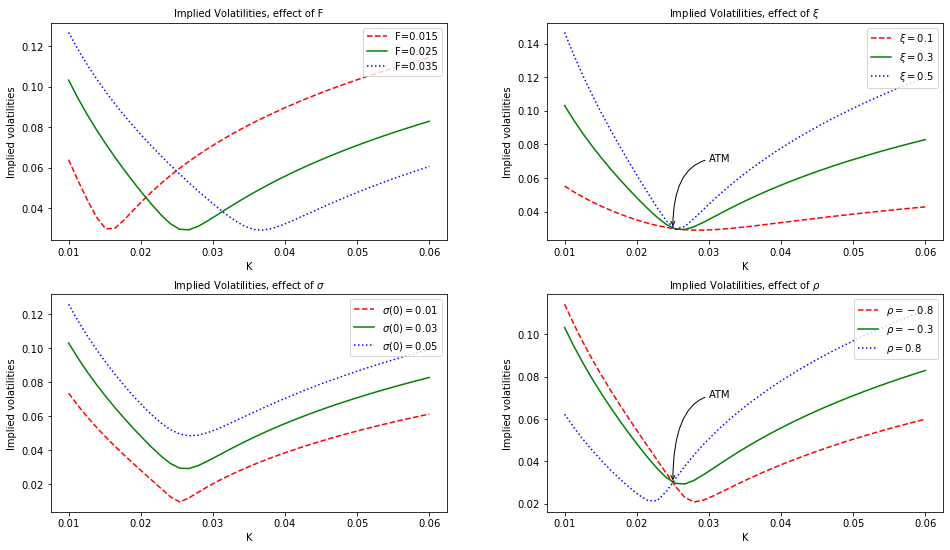

In [10]:
fig = plt.figure(figsize=(16, 14))
grid = plt.GridSpec(3, 6, wspace=1.5, hspace=0.25)

ax0 = plt.subplot(grid[0, 0:3])
ax0.plot(K, sabr_prices_F1, 'r--')
ax0.plot(K, sabr_prices_F, 'g-')
ax0.plot(K, sabr_prices_F2, 'b:')
ax0.set_title('Implied Volatilities, effect of F', fontsize=10)
ax0.set_xlabel("K")
ax0.set_ylabel("Implied volatilities")
ax0.legend([r'F=0.015', r'F=0.025', r'F=0.035'], loc='upper right')


ax1 = plt.subplot(grid[0, 3:6])
ax1.plot(K, sabr_prices_xi1, 'r--')
ax1.plot(K, sabr_prices_xi, 'g-')
ax1.plot(K, sabr_prices_xi2, 'b:')
ax1.set_title('Implied Volatilities, effect of $\\xi$', fontsize=10)
ax1.annotate('ATM', xy=(0.025, 0.03), xytext=(0.03, 0.07),arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
ax1.set_xlabel("K")
ax1.set_ylabel("Implied volatilities")
ax1.legend([r'$\xi=0.1$', r'$\xi=0.3$', r'$\xi=0.5$'], loc='upper right')

ax2= plt.subplot(grid[1, 0:3])
ax2.plot(K, sabr_prices_sigma_01, 'r--')
ax2.plot(K, sabr_prices_sigma_0, 'g-')
ax2.plot(K, sabr_prices_sigma_02, 'b:')
ax2.set_title('Implied Volatilities, effect of $\sigma$', fontsize=10)
ax2.set_xlabel("K")
ax2.set_ylabel("Implied volatilities")
ax2.legend([r'$\sigma(0)=0.01$', r'$\sigma(0)=0.03$', r'$\sigma(0)=0.05$'], loc='upper right')

ax3 = plt.subplot(grid[1, 3:6])
ax3.plot(K, sabr_prices_rho1, 'r--')
ax3.plot(K, sabr_prices_rho, 'g-')
ax3.plot(K, sabr_prices_rho2, 'b:')
ax3.set_title('Implied Volatilities, effect of $\\rho$', fontsize=10)
ax3.annotate('ATM', xy=(0.025, 0.03), xytext=(0.03, 0.07),arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
ax3.set_xlabel("K")
ax3.set_ylabel("Implied volatilities")
ax3.legend([r'$\rho=-0.8$', r'$\rho=-0.3$', r'$\rho=0.8$'], loc='upper right');

'''
######## IF YOU WANT TO INCLUDE DIFFERENT Times T
ax4 = plt.subplot(grid[2, 0:3])
ax4.plot(K, sabr_prices_T1, 'r--')
ax4.plot(K, sabr_prices_T2, 'g-')
ax4.plot(K, sabr_prices_T, 'b:')
ax4.set_title('Implied Volatilities, effect of T', fontsize=10)
ax4.set_xlabel("K")
ax4.set_ylabel("Implied volatilities")
ax4.legend([r'T=0.003', r'T=0.5', r'T=1.'], loc='upper right')



######## IF YOU WANT TO INCLUDE DIFFERENT BETAS
ax5 = plt.subplot(grid[2, 3:6])
ax5.plot(K, sabr_prices_beta1, 'r--')
ax5.plot(K, sabr_prices_beta, 'g-')
ax5.plot(K, sabr_prices_beta2, 'b:')
ax5.set_xlabel("strike")
ax5.set_ylabel("implied volatility")
ax5.legend([r'$\beta=0.0$', r'$\beta=1$', r'$\beta=0.5$'], loc='upper right')
''';

'''
fig.savefig('/Users/Marcklein/Desktop/Master Thesis/Option pricing using Neural Networks/Python/SABR_implied_vol.png',bbox_inches='tight')
''';